# 1. Описательные статистики

In [2]:
import pandas as pd
import numpy as np
import xlrd
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, kurtosis
xls = pd.ExcelFile(r"table.xls")
sheetX = xls.parse(1)
var1 = sheetX['A5']
X1 = np.array(var1)
var2 = sheetX['A6']
X2 = np.array(var2)
var3 = sheetX['A8']
X3 = np.array(var3)
np.size(X1), X2, X3

(1073,
 array([382, 560, 494, ..., 383, 348, 410], dtype=int64),
 array([382, 508, 415, ..., 383, 315, 445], dtype=int64))

### $\bar{x}=\frac{1}{n} \sum_{i=1}^n x_i=\frac{1}{n}\left(x_1+\cdots+x_n\right)$


### $s^2=\frac{1}{n} \sum_{i=1}^n\left(X_i-\bar{X}\right)^2$


### $s=\sqrt(\frac{1}{n} \sum_{i=1}^n\left(X_i-\bar{X}\right)^2)$


### $\gamma_x=\left[\frac{n}{(n-1)(n-2)}\right] \frac{\sum_{i=1}^n\left(X_i-\bar{X}\right)^3}{s^3}$


### $\epsilon_x=\frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^n\left(\frac{x_i-\bar{x}}{s}\right)^4-\frac{3(n-1)^2}{(n-2)(n-3)}$

In [3]:
m1 = np.mean(X1)
m1

526.4836905871389

In [4]:
m2 = np.mean(X2)
m2

420.04193849021436

In [5]:
m3 = np.mean(X3)
m3

428.0326188257223

In [6]:
s1 = np.var(X1, ddof=1)
s1

13868.856310247458

In [7]:
s2 = np.var(X2, ddof=1)
s2

4957.764097731288

In [8]:
s3 = np.var(X3, ddof=1)
s3

8217.62113651222

In [9]:
s1 = np.std(X1, ddof=1)
s1

117.7661084958124

In [10]:
s2 = np.std(X2, ddof=1)
s2

70.4113918178819

In [11]:
s3 = np.std(X3, ddof=1)
s3

90.6510956167228

In [12]:
skew(X1)
0.6795990400916552

0.6795990400916552

In [13]:
skew(X2)

0.3481481718850067

In [14]:
skew(X3)

0.8191411695756438

In [15]:
kurtosis(X1)

0.5304432832288937

In [16]:
kurtosis(X2)

0.17581685259992685

In [17]:
kurtosis(X3)

0.9757478446505425

In [18]:
var = sheetX['A8']
X = np.array(var)

In [19]:
hist, bin_edges = np.histogram(X, bins=21)
bin_edges

array([232.        , 262.19047619, 292.38095238, 322.57142857,
       352.76190476, 382.95238095, 413.14285714, 443.33333333,
       473.52380952, 503.71428571, 533.9047619 , 564.0952381 ,
       594.28571429, 624.47619048, 654.66666667, 684.85714286,
       715.04761905, 745.23809524, 775.42857143, 805.61904762,
       835.80952381, 866.        ])

In [20]:
stored, stored1 = 0, 0
Xf, Xf1, Xf2 = [], [], []
count = 0
for i in range(21):
    arr = X[bin_edges[i] <= X]
    arr1 = arr[arr < bin_edges[i + 1]]
    if i == 20:
        arr = X[bin_edges[i] <= X]
        arr1 = arr[arr <= bin_edges[i + 1]]
    stored += len(arr1)
    stored1 += round(len(arr1)/len(X), 3)
    Xf.append(stored)
    Xf1.append(stored1)
    Xf2.append(len(arr1))
    count += 1
    print(count, round(bin_edges[i], 2), round(bin_edges[i+1], 2), len(arr1),
          round(len(arr1)/len(X), 3), stored, round(stored1, 3))

1 232.0 262.19 5 0.005 5 0.005
2 262.19 292.38 28 0.026 33 0.031
3 292.38 322.57 67 0.062 100 0.093
4 322.57 352.76 128 0.119 228 0.212
5 352.76 382.95 148 0.138 376 0.35
6 382.95 413.14 155 0.144 531 0.494
7 413.14 443.33 142 0.132 673 0.626
8 443.33 473.52 107 0.1 780 0.726
9 473.52 503.71 73 0.068 853 0.794
10 503.71 533.9 70 0.065 923 0.859
11 533.9 564.1 69 0.064 992 0.923
12 564.1 594.29 32 0.03 1024 0.953
13 594.29 624.48 22 0.021 1046 0.974
14 624.48 654.67 11 0.01 1057 0.984
15 654.67 684.86 4 0.004 1061 0.988
16 684.86 715.05 5 0.005 1066 0.993
17 715.05 745.24 2 0.002 1068 0.995
18 745.24 775.43 2 0.002 1070 0.997
19 775.43 805.62 1 0.001 1071 0.998
20 805.62 835.81 1 0.001 1072 0.999
21 835.81 866.0 1 0.001 1073 1.0


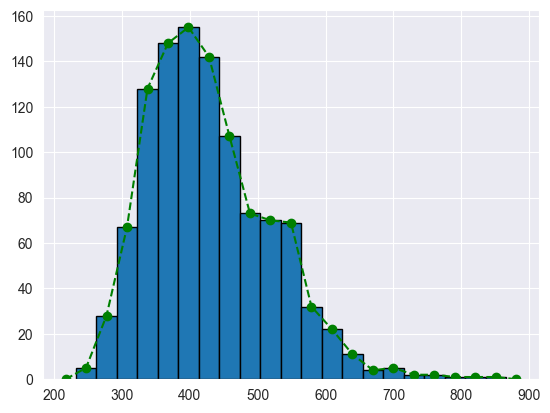

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
a,bins,_ = plt.hist(X, density=False, edgecolor='black',bins=21)
x = np.append([0], a)
x = np.append(x, [0])
width = (X.max() - X.min())/21
bins = np.append([bins[0] - width], bins)
y = bins + width / 2
plt.plot(y, x,'go--')
plt.show()

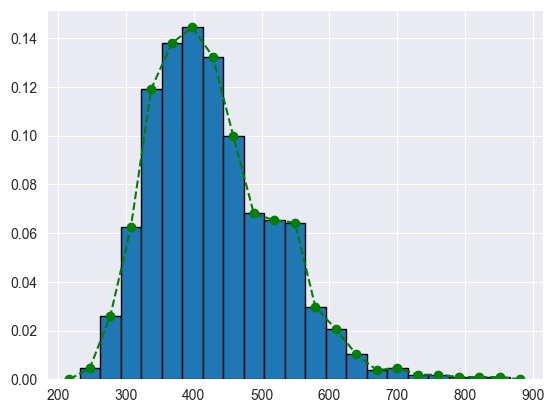

In [22]:
a,bins,_ = plt.hist(X, density=False, edgecolor='black', weights=np.ones_like(X)/len(X),bins=21)
x = np.append([0], a)
x = np.append(x, [0])
width = (X.max() - X.min())/21
bins = np.append([bins[0] - width], bins)
y = bins + width / 2
plt.plot(y, x,'go--')
plt.show()

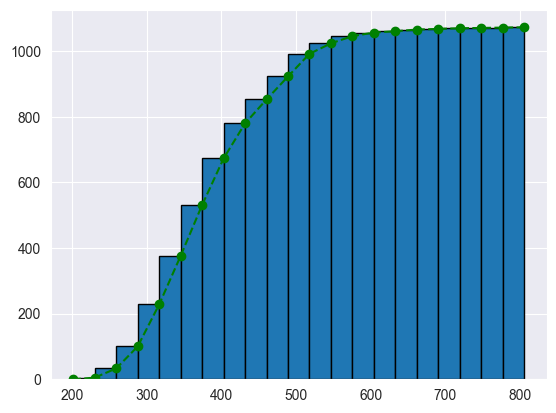

In [23]:
a,bins,_ = plt.hist(bins[:-2], density=False, weights=Xf, edgecolor='black', bins=21)
x = np.append([0], a)
plt.plot(bins, x,'go--')
plt.show()

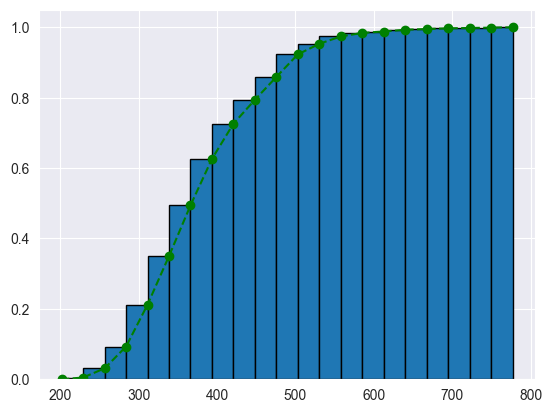

In [24]:
a, bins, _ = plt.hist(bins[:-1], density=False, weights=Xf1, edgecolor='black', bins=21)
x = np.append([0], a)
plt.plot(bins, x, 'go--')
plt.show()

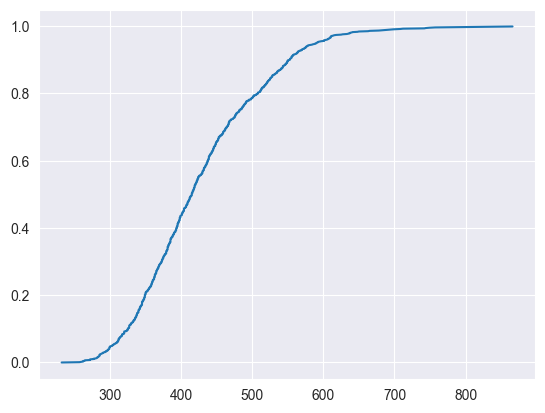

In [25]:
plt.plot(np.sort(X), np.linspace(0, 1, len(X), endpoint=False))

# 2. Интервальные оценки

# $\bar{x} + t_{1 - \alpha / 2} \times \frac{s}{\sqrt{(n)}}$

# $\bar{x} - t_{\alpha / 2} \times \frac{s}{\sqrt{(n)}}$

In [26]:
import scipy.stats as st
np.std(X, ddof=1)/np.sqrt(X.shape[0]), st.sem(X)

(2.7674080276552093, 2.7674080276552093)

In [27]:
var = sheetX['A8']
X = np.array(var)
st.t.interval(confidence=0.99, df=len(X)-1,
              loc=np.mean(X),
              scale=st.sem(X))

(420.89153457926255, 435.17370307218204)

In [28]:
st.t.interval(confidence=0.95, df=len(X)-1,
              loc=np.mean(X),
              scale=st.sem(X))

(422.60246785148496, 433.46276979995963)

In [29]:
st.t.interval(confidence=0.9, df=len(X)-1,
              loc=np.mean(X),
              scale=st.sem(X))

(423.47670060495653, 432.58853704648806)

# $\frac{(n-1) s^2}{\chi_{1 - \frac{\alpha}{2}}^2} \leq \sigma^2 \leq \frac{(n-1) s^2}{\chi_{\frac{\alpha}{2}}^2}$

In [30]:
x, y = np.reciprocal(st.chi2.interval(confidence=0.99, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(7371.647997304441, 9210.031517920675)

In [31]:
x, y = np.reciprocal(st.chi2.interval(confidence=0.95, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(7564.010893742589, 8960.215662750727)

In [32]:
x, y = np.reciprocal(st.chi2.interval(confidence=0.9, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(7665.036398218402, 8835.871401159964)

In [33]:
var1, var2 = sheetX['A5'], sheetX['A8']
X1 = np.array(var1)
X2 = np.array(var2)

# $\left(\bar{x}_1-\bar{x}_2\right)-t_{\frac{\alpha}{2}} \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}<m_1-m_2<\left(\bar{x}_1-\bar{x}_2\right)+t_{1 - \frac{\alpha}{2}} \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$

In [34]:
st.t.interval(confidence=0.99, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(st.sem(X1) ** 2 + st.sem(X2) ** 2))

(86.75426715866607, 110.1478763641671)

In [35]:
st.t.interval(confidence=0.95, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(st.sem(X1) ** 2 + st.sem(X2) ** 2))

(89.55380320157862, 107.34834032125455)

In [36]:
st.t.interval(confidence=0.9, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(st.sem(X1) ** 2 + st.sem(X2) ** 2))

(90.9852379876537, 105.91690553517947)

# $\frac{s_1^2}{s_2^2} \cdot F_{1 - \frac{\alpha}{2}} < \frac{\sigma_1^2}{\sigma_2^2} < \frac{s_1^2}{s_2^2} \cdot F_{\frac{\alpha}{2}}$

In [37]:
st.f.interval(confidence=0.99, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(1.4418157917941776, 1.9755102610660702)

In [38]:
st.f.interval(confidence=0.95, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(1.4971711896967779, 1.9024690769219053)

In [39]:
st.f.interval(confidence=0.9, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(1.526297702994823, 1.866164042354036)

# 3

## 3.1

## Стат.гипотеза:
## $H_0: m = m_0$
## $H': m \neq m_0$

## Формула расчета статистики критерия

## $Z = \frac{\bar{x} - m_0}{\frac{S}{\sqrt(n)}}$

## Закон распределения статистики критерия при условии истинности основной гипотезы

## $T(n - 1)$

## Формулы расчета критических точек
## $+ t_{1-\frac{\alpha}{2}}(n-1)$
## $- t_{1-\frac{\alpha}{2}}(n-1)$
## Формула расчета p-value
## $f(x)= \frac{\Gamma\left(\frac{n+1}{2}\right)}{\sqrt{n \pi} \Gamma\left(\frac{n}{2}\right)\left(1+\frac{x^2}{n}\right)^{\frac{n+1}{2}}}$

In [40]:
from scipy.stats import stats as stats

var1 = sheetX['A8']
X1 = np.array(var1)

In [41]:
np.mean(X1)

428.0326188257223

In [42]:
Z, p_value = stats.ttest_1samp(a=X1, popmean=430, axis=0, alternative='two-sided')
Z, p_value

C:\Users\Artemii\AppData\Local\Temp\ipykernel_1660\3971063016.py:1: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  Z, p_value = stats.ttest_1samp(a=X1, popmean=430, axis=0, alternative='two-sided')


(-0.7109111322281748, 0.47729394939688297)

In [43]:
Z, p_value = stats.ttest_1samp(a=X1, popmean=428, axis=0, alternative='two-sided')
Z, p_value

C:\Users\Artemii\AppData\Local\Temp\ipykernel_1660\2376373855.py:1: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  Z, p_value = stats.ttest_1samp(a=X1, popmean=428, axis=0, alternative='two-sided')


(0.01178677860161184, 0.990597922192902)

In [44]:
Z, p_value = stats.ttest_1samp(a=X1, popmean=420, axis=0, alternative='two-sided')
Z, p_value

C:\Users\Artemii\AppData\Local\Temp\ipykernel_1660\1161726094.py:1: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  Z, p_value = stats.ttest_1samp(a=X1, popmean=420, axis=0, alternative='two-sided')


(2.9025784219207584, 0.0037768199394206765)

In [45]:
m1 = np.mean(X1)
m1

428.0326188257223

In [46]:
s1 = np.std(X1, ddof=1)
s1

90.6510956167228

In [47]:
d1 = np.var(X1, ddof=1)
d1

8217.62113651222

## 3.2

## Стат.гипотеза:
## $H_0: \sigma = \sigma_0$
## $H': \sigma \neq \sigma_0$
## Формула расчета статистики критерия
## $Z = \frac{(n - 1)S^2}{\sigma_0^2}$
## Закон распределения статистики критерия при условии истинности основной гипотезы
## $X \sim \chi^2(n-1)$
## Формулы расчета критических точек
## $\chi^2_{\frac{\alpha}{2}}(n-1)$
## $\chi^2_{1 - \frac{\alpha}{2}}(n-1)$
## Формула расчета p-value
## $\frac{(1 / 2)^{k / 2}}{\Gamma(k / 2)} x^{k / 2-1} e^{-x / 2}$

### $\alpha = 0.1$
### Right $\chi^2$: 1,149.2822
### Left $\chi^2$: 996.9916

In [48]:
import math

np.std(X1, ddof = 1)

90.6510956167228

In [49]:
def chisquare(dist, m, d, bins=10, ddof=0):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (st.norm.cdf(bins1[1:], m, d) - st.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, st.chi2.cdf(Z, bins - 1 - ddof)

In [50]:
def chisquare1(dist, d, d0, ddof=1):
    Zc = ((len(dist) - 1) * d / d0 ** 2)
    p_value = 2 * (1 - st.chi2.cdf(Zc, len(dist) - ddof))
    if p_value > 1:
        p_value = 2 - p_value
    return Zc, p_value

In [51]:
Z1, p1 = chisquare1(X1, d1, 90.5)
Z2, p2 = chisquare1(X1, d1, 95)
Z3, p3 = chisquare1(X1, d1, 88)
Z1, Z2, Z3

(1075.5825351290987, 976.0985992621717, 1137.5632565006586)

In [52]:
p1, p2, p3

(0.9269527636540926, 0.03385066048661445, 0.16079621267862665)

https://calculator-online.net/p-value-from-chi-square-calculator

## $\sigma_0 = 91: p-value = 0.93$
## $\sigma_0 = 95: p-value = 0.03$
## $\sigma_0 = 85: p-value = 0.16$


## 3.3
## Стат.гипотеза:
## $H_0$: $m_1 = m_2$
## $H'$: $m_1 \neq m_2$
## Формула расчета статистики критерия
## $Z=\frac{\left(\bar{x}_1-\bar{x}_2\right)-\left(m_1-m_2\right)}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$
## Закон распределения статистики критерия при условии истинности основной гипотезы
## $X \sim T(n_1 + n_2 - 2)$
## Формулы расчета критических точек
## $+ T_{1-\alpha}(n_1 + n_2 - 2)$
## $- T_{1-\alpha}(n_1 + n_2 - 2)$
## Формула расчета p-value
## $f(x)= \frac{\Gamma\left(\frac{n+1}{2}\right)}{\sqrt{n \pi} \Gamma\left(\frac{n}{2}\right)\left(1+\frac{x^2}{n}\right)^{\frac{n+1}{2}}}$

In [53]:
var1 = sheetX['A5']
var2 = sheetX['A8']
X1 = np.array(var1)
X2 = np.array(var2)

In [54]:
m1 = np.mean(X1)
m2 = np.mean(X2)
m1, m2

(526.4836905871389, 428.0326188257223)

In [55]:
Z, p_value = stats.ttest_ind(X1, X2, alternative='two-sided')
Z, p_value

C:\Users\Artemii\AppData\Local\Temp\ipykernel_1660\1219582587.py:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  Z, p_value = stats.ttest_ind(X1, X2, alternative='two-sided')


(21.699867460073605, 1.484390672999057e-94)

In [56]:
import pingouin as pg
pg.ttest(X1, X2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,21.699867,2144,two-sided,1.484391e-94,"[89.55, 107.35]",0.936855,5.341e+90,1.0


In [57]:
def var(dist, m):
    return np.sum((dist - m) ** 2) / dist.shape[0]
def std(dist, m):
    return np.sqrt(var(dist, m))

## 3.4
## Стат.гипотеза:
## $H_0$: $\sigma_1 = \sigma_2$
## $H'$: $\sigma_1 \neq \sigma_2$
## Формула расчета статистики критерия
## $Z = \frac{\frac{\chi^2(n_1)}{n_1}}{\frac{\chi^2(n_2)}{n_2}}$
## Закон распределения статистики критерия при условии истинности основной гипотезы
## $X \sim F(n_1 - 1, n_2 - 1)$
## Формулы расчета критических точек
## $F_{\frac{\alpha}{2}}(n_1 - 1, n_2 - 1)$
## $F_{1 - \frac{\alpha}{2}}(n_1 - 1, n_2 - 1)$
## Формула расчета p-value
## $\frac{\sqrt{\frac{\left(d_1 x\right)^{d_1} d_2^{d_2}}{\left(d_1 x+d_2\right)^{d_1+d_2}}}}{x \mathrm{~B}\left(\frac{d_1}{2}, \frac{d_2}{2}\right)}$
## $d_1, d_2$ - степени свободы
## B - beta функция

In [58]:
v1 = np.var(X1, ddof=1)
v2 = np.var(X2, ddof=1)
v1, v2

(13868.856310247458, 8217.62113651222)

In [59]:
def f_test(dist1, dist2, m1, m2, ddof=0):
    d1, d2 = var(dist1, m1), var(dist2, m2)
    f = d1 / d2
    n1, n2 = dist1.shape[0] - ddof, dist2.shape[0] - ddof
    return f, st.f.cdf(f, n1, n2)

In [60]:
Z, p_value = f_test(X1, X2, m1, m2, ddof=1)
p_value = 1 - p_value
Z, p_value

(1.6876972155148267, 1.1102230246251565e-16)